<a id='top'></a>

# CSCI3022 F21
# Homework 7: Testing
***

**Name**: Nathan Shaver

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Wed 10 Nov**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [20 points] Problem 1- Time and Testing 

The beautiful cheryr blossoms of Kyoto bloomed their earliest day on record this year, signalling an early start to spring!   (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?  Is this evidence of climate change?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

In [2]:
filepath = '/home/jovyan/3022/hw/hw7/kyotoflowers.csv'
df = pd.read_csv(filepath)

#testing to see if file path works
df.head()

,AD,Full-flowering date (DOY)
0,801,NaN
1,802,NaN
2,803,NaN
3,804,NaN
4,805,NaN


Text(0, 0.5, 'Full Flowering date')

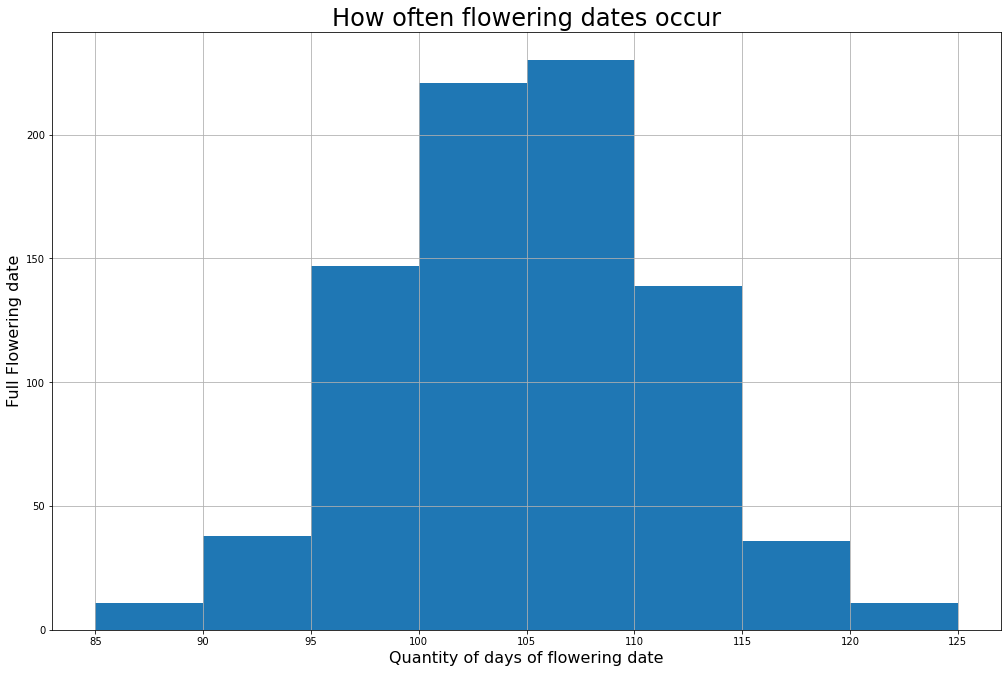

In [3]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
bins = [85, 90, 95, 100, 105, 110, 115, 120, 125]
#making the plot
df.hist(column = 'Full-flowering date (DOY)', ax = ax, bins = bins)
ax.set_title("How often flowering dates occur", fontsize=24)
ax.set_xlabel("Quantity of days of flowering date", fontsize=16)
ax.set_ylabel("Full Flowering date", fontsize=16)

The data appears to be normally distributed. The distribution is unimodal and has no clear right or left skew, along with no outliers.

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

(812.0, 2021.0)

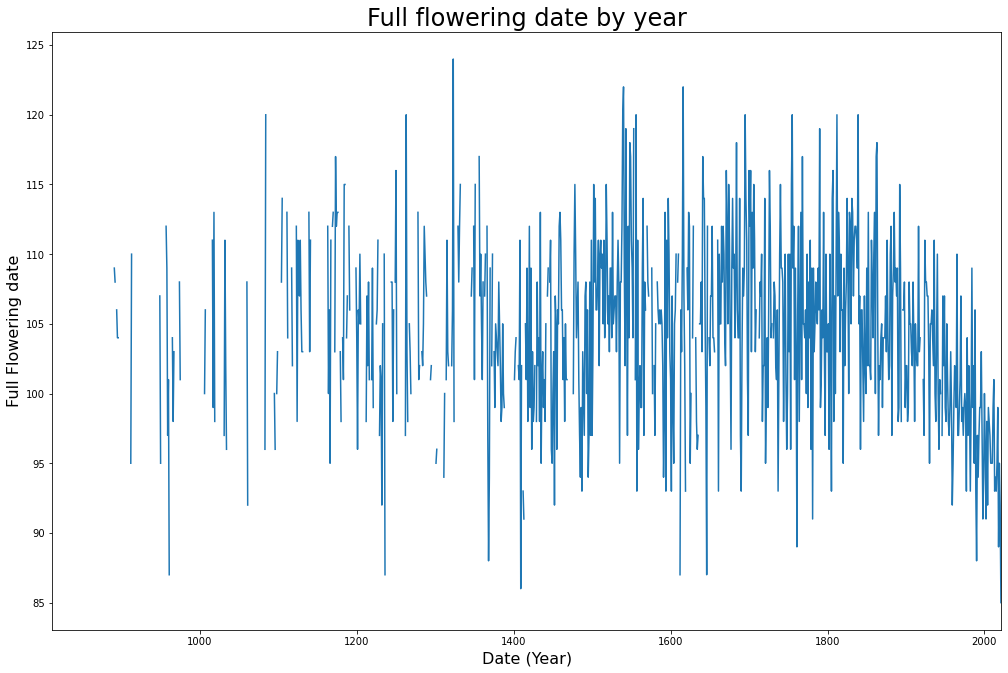

In [4]:
fig, ax = plt.subplots(1,1, figsize = (17,11))
#making the x and y axes and plotting them
x = df['AD']
y = df['Full-flowering date (DOY)']
plt.plot(x,y)
ax.set_title("Full flowering date by year", fontsize=24)
ax.set_xlabel("Date (Year)", fontsize=16)
ax.set_ylabel("Full Flowering date", fontsize=16)
plt.xlim([812,2021])

**Solution Markdown:**

Visually, there is an increase in reported data. From the years 800 to 1400 there are large gaps in the data where the date wasn't reported. From 1400 onward, there is a disctince increase in reported data. From 800 to 1850, the date stays within a healthy median. However, after 1850, the dates have begun to decrease at a constant rate.

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [5]:
quartile = df.dropna(subset = ['Full-flowering date (DOY)'])
quartile = quartile['Full-flowering date (DOY)']
#making the 5 number summary
q1 = np.quantile(quartile, .25)
q2 = np.quantile(quartile, .50)
q3 = np.quantile(quartile, .75)
kmax = quartile.max()
kmin = quartile.min()
ksum = quartile.sum()
kmean = ksum/len(quartile)
kstd = quartile.std()
print("Min:", kmin)
print("Q1:", q1)
print("Median:", q2)
print("Q3:", q3)
print("Max:", kmax)
print("Mean:", kmean)
print("Standard Deviation:", kstd)

Min: 85.0
Q1: 100.0
Median: 104.0
Q3: 109.0
Max: 124.0
Mean: 104.45378151260505
Standard Deviation: 6.476146188669122


**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?

Hypothesis tests give us a clear way to do this!  We can compare e.g. the last $n$ years of data to **all** the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of dates, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior **all**-observed years.  If you reject the null hypothesis, output a confidence interval for the different in mean full-flowering dates for the two sets of years.

Write a sentence interpreting your results.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in in $n$ any variance/confidence/etc. calculations.

In [6]:
#calclating observations between 2010-2021
temp1 =(df.loc[(df['AD'] >= 2010)])
temp1mean = temp1.mean(axis = 0, skipna = True)[1]
stdtemp1 = quartile.loc[(df['AD'] >= 2010)]
stdtemp12 = stdtemp1.std()
#calculating observations from before 2010
temp2 =(df.loc[(df['AD'] < 2010)])
temp2mean = temp2.mean(axis = 0, skipna = True)[1]
print("Mean from 2010-2021:", temp1mean, "and sample standard deviation:", stdtemp12)
print("Mean from 2009 and earlier", temp2mean)

Mean from 2010-2021: 94.16666666666667 and sample standard deviation: 4.407294229370491
Mean from 2009 and earlier 104.6041412911084


**Solution Markdown:**

Test statistic formula: $z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} = \frac{94.167-104.604}{4.407-\sqrt{12}} = -8.20$

Using a standard normal table, a z value of -8.20 produces a p value of .0000. Since the p-value = 0.0000 $\leq \alpha = .01$

Therefore, we reject the null hypothesis and the mean for this inverval is **not** the same as the mean for all prior observed years. This is a likely indication of the presense of global warming, especially for such a low level of significance. 

Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

**Solution Markdown:**


**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of **every** starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1632 to 2007-2021 contains zero, then print `1618`.)  Report:
- The earliest date of such an interval containing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [7]:
import math
listofmeans = []
meansnp = np.array(listofmeans)
std = df.std()[1]
#calculating the mean for each 12 year interval. Standard deviation is taken from entire population
i = 1600
while i < 2009:
    temp0 =(df.loc[(df['AD'] >= i)])
    temp1 =(temp0.loc[(temp0['AD'] < i + 12)])
    mean = temp1.mean(axis = 0)[1]
    meansnp = np.append(meansnp, mean)
    i = i + 12

j = 0
upper = []
lower = []
uppernp = np.array(upper)
lowernp = np.array(lower)
#calculating confidence interval for each 12 year interval using means from above
while j < len(meansnp):
    calcL = meansnp[j]-temp1mean - (2.576*std/math.sqrt(12))
    calcU = meansnp[j]-temp1mean + (2.576*std/math.sqrt(12))
    lowernp = np.append(lowernp, calcL)
    uppernp = np.append(uppernp, calcU)
    j = j + 1
i = 1600
j = 0
while i < 2009:
    print("Confidence Interval from", i, "to", i + 12, ":", round(lowernp[j], 3), ",", round(uppernp[j], 3))
    i = i + 12
    j = j + 1
    
print("The first interval to contain 0 is 1972 and the latest interval to not contain 0 is 1960")
    

Confidence Interval from 1600 to 1612 : 4.417 , 14.049
Confidence Interval from 1612 to 1624 : 6.29 , 15.922
Confidence Interval from 1624 to 1636 : 3.017 , 12.649
Confidence Interval from 1636 to 1648 : 7.29 , 16.922
Confidence Interval from 1648 to 1660 : 6.684 , 16.316
Confidence Interval from 1660 to 1672 : 8.351 , 17.983
Confidence Interval from 1672 to 1684 : 9.017 , 18.649
Confidence Interval from 1684 to 1696 : 8.017 , 17.649
Confidence Interval from 1696 to 1708 : 10.851 , 20.483
Confidence Interval from 1708 to 1720 : 5.462 , 15.094
Confidence Interval from 1720 to 1732 : 6.381 , 16.013
Confidence Interval from 1732 to 1744 : 6.767 , 16.399
Confidence Interval from 1744 to 1756 : 6.351 , 15.983
Confidence Interval from 1756 to 1768 : 5.934 , 15.566
Confidence Interval from 1768 to 1780 : 6.434 , 16.066
Confidence Interval from 1780 to 1792 : 6.767 , 16.399
Confidence Interval from 1792 to 1804 : 5.267 , 14.899
Confidence Interval from 1804 to 1816 : 8.767 , 18.399
Confidence 

**Solution Markdown:**


Given that the last 99% confidence interval that didn't contain 0 was in 1960, and the first interval to contain a 0 was in 1972, it's fair to assume that flowering dates are getting earlier.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [10 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (4 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**Solution Markdown:**

Methodoligists want to lower the standard P-value from .05 to .005. This is due to many researchers misunderstanding the point of the statistical significance as "Probability that the studied hypothesis is true." Lowering the P value threshold will improve the quality of research and studies to pass more demanding statistical significances. I'm not sure I agree with this suggestion, however, as I think .05 is a significant enough P value. Other alternatives inlcude using the exact P value and training the scientific workforce on these kinds of statistics.


#### 2B (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

**Solution Markdown:**

I would much rather have a low Type II error rate than a low Type I error rate. A Type II error is when we accept a false hypothesis, essentially a false positive. In this situation, it would mean the carbon fiber being tested as above tolerance, when in reality it is below tolerance. This would be especially problematic, as it means we would be green lighting a faulty part for an airplane. A type I error, on the other hand, is rejecting a true hypothesis. This would mean testing a carbon fiber and incorrectly assessing it as below tolerance, when in reality it is the opposite. The worst case scenario in this case would be a good piece of carbon fiber being rejected.

#### 2C (4pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7.44373 kilometers. Inspecting their study and the descriptions of their 66 measurements, it is reasonable to assume that the data were iid.  Their measurements are below.

Construct an approximate 99\% confidence interval for the time light takes to travel 7400 meters.

Then perform a hypothesis test on whether or not this value significant differs from the approximation that $c=3.0 \cdot 10^8$ meters per second. (Note: The true vale of $c=299792458 \frac{m}{s}$, and your confidence interval can be converted to $\frac{s}{m}$.)

In [8]:
data=[24.828,24.826,24.833,24.824,24.834,24.756,24.827,24.816,24.84,24.798,24.829,24.822,\
      24.824,24.821,24.825,24.83,24.823,24.829,24.831,24.819,24.824,24.82,24.836,24.832,\
      24.836,24.828,24.825,24.821,24.828,24.829,24.837,24.825,24.828,24.826,24.83,24.832,\
      24.836,24.826,24.83,24.822,24.836,24.823,24.827,24.827,24.828,24.827,24.831,24.827,\
      24.826,24.833,24.826,24.832,24.832,24.824,24.839,24.828,24.824,24.825,24.832,24.825,\
      24.829,24.827,24.828,24.829,24.816,24.823]

In [9]:
datanp = np.array(data)
mean1 = datanp.mean()
std1 = datanp.std()
#calculating confidence interval
upper =  mean1 + (2.576*std1/math.sqrt(len(datanp)))
lower = mean1 - (2.576*std1/math.sqrt(len(datanp)))
print("99% Confidence Interval:", round(lower, 7), ",", round(upper, 7))
print("99% Confidence Interval converted into meters/second:", round((lower/7.44373) * (10**8), 2), round((upper/7.44373) * (10**8),2))
print("Z test calculation:", (((lower/7.44373) * (10**8)-299792458)/(std1/math.sqrt(len(datanp)))))
print("On a Z table, this equates to a p value of 1.000. Since 0.000 < .01, we reject Ho")

99% Confidence Interval: 24.8228309 , 24.8295934
99% Confidence Interval converted into meters/second: 333473015.07 333563863.52
Z test calculation: 25659428332.217136
On a Z table, this equates to a p value of 1.000. Since 0.000 < .01, we reject Ho


<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [15 points] Problem 3 - The power!


Let $Y$ be the number of heads in 100 tosses of a possibly biased coin, with probability of heads on any toss $p$. Similar to the Belgian Euro example, we hope to *test* whether the coin is biased **toward heads**.

#### Part a)

State the null and alternative hypotheses.


**Solution Markdown:**

$H_o$: There is no bias towards heads when flipping a coin.

$H_a$: There is a bias towards heads when flipping a coin.


#### Part b)
Suppose we define the rejection region to be $Y > 55$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)


In [10]:
from scipy.stats import binom
final = binom.cdf(55, 100, .5)
print("The rate of a Type I error is:", round(1 - final, 5))

The rate of a Type I error is: 0.13563



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).


In [11]:
import random
i = 0
heads = 0
tails = 0
list1 = ['h', 't']
#running one data set and determining if we reject or accept Ho
while i < 100:
    if(random.choice(list1) == 'h'):
        heads = heads + 1
    else:
        tails = tails + 1
    i = i + 1
if(heads > 55):
    print("The dataset produced", heads, "number of heads. Since the rejection region is Y > 55 we reject the null hypothesis and accept the alternative hypothesis that there is a bias towards heads")
    print("This conclusion is an error because there is no bias towards heads (P = .5)")
else:
    print("The dataset produced", heads, "number of heads. Since the rejection region is Y > 55 we accept the null hypothesis that there is no bias towards heads")
    print("This conclusion is not an error because there is no bias towards heads (P = .5)")
    
Ho = 0
Ha = 0
j = 0
#running a dataset 1000 times and summing the total amount of times we reject or accept Ho
while j < 1000:
    i = 0
    heads = 0
    tails = 0
    list1 = ['h', 't']
    while i < 100:
        if(random.choice(list1) == 'h'):
            heads = heads + 1
        else:
            tails = tails + 1
        i = i + 1
    if(heads > 55):
        Ha = Ha + 1
    else:
        Ho = Ho + 1
    j = j + 1
type1 = Ha/1000
print("Running the simulation 1000 times produces a Type I error rate of", type1, "which is accurate from our result in part B")

The dataset produced 58 number of heads. Since the rejection region is Y > 55 we reject the null hypothesis and accept the alternative hypothesis that there is a bias towards heads
This conclusion is an error because there is no bias towards heads (P = .5)
Running the simulation 1000 times produces a Type I error rate of 0.121 which is accurate from our result in part B



#### Part d)
Consider that the *reality* of a biased coin could take on any number of possible different values of actual bias $p$.  Construct a grid/list of possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the power of the test from part $a$.  If possible, return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

Text(0.5, 1.0, 'Power of rejecting null hypothesis vs Probability of Heads')

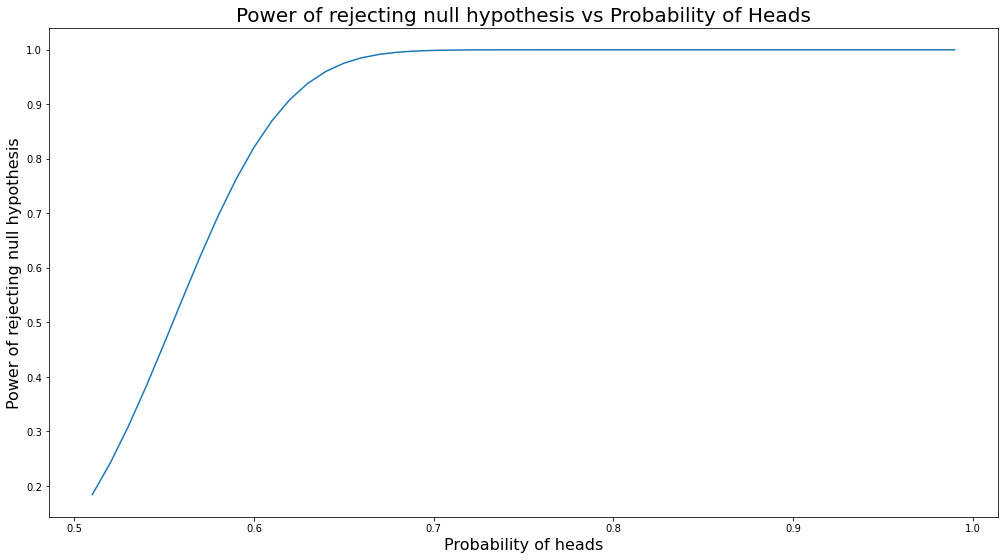

In [12]:
plist = []
plistnp = np.array(plist)
list1 = []
list1np = np.array(list1)
i = .51
#calculating the power for each probability between .51 and 1.00
while i < 1.01:
    final = 1 - binom.cdf(55, 100, i)
    plistnp = np.append(plistnp, final)
    list1np = np.append(list1np, i)
    i = i + .01
fig, ax = plt.subplots(1,1, figsize = (17,9))
plt.plot(list1np, plistnp)
ax.set_xlabel("Probability of heads", fontsize=16)
ax.set_ylabel("Power of rejecting null hypothesis", fontsize=16)
ax.set_title("Power of rejecting null hypothesis vs Probability of Heads", fontsize=20)

**Solution Markdown:**

As the probability of heads increases, the probability of rejecting the null hypothesis and accepting the alternative hypothesis increases. Around p = .65, the power flattens out to roughly 100%. This makes since since the alternative hypothesis is the existance of a bias towards flipping heads.

#### Part e)

(e) Suppose we allowed other rejection regions than $Y>55$.  Use the ideas in part (d) to answer the following: how many flips $m$ of a coin are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a)?

*Hint*: You can brute force this to find the first value of $n$ that satisfies the requirement.  It's quite a few flips...

In [13]:
from scipy.stats import binom
final = binom.cdf(57, 100, .5)
print("The rate of a Type I error is:", round(1 - final, 5))

The rate of a Type I error is: 0.06661


**Solution Markdown:**
